<a href="https://colab.research.google.com/github/TurboGooseEdu/Intelligent-systems/blob/main/Dimension_reduction_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison analysis of dimension reduction algorithms

### Compared algorithms:
* PCA
* SVD
* t-SNE
* UMAP

### Used datasets:
* **PenDigits** - is a set of 1797 grayscale images of digits entered using a digitiser tablet.
* **MNIST** - is a dataset of 28x28 pixel grayscale images of handwritten digits.
* **Fashion MNIST** - is a dataset of 28x28 pixel grayscale images of fashion items (clothing, footwear and bags).
* **Shuttle** - is a NASA dataset consisting of various data associated to the positions of radiators in the space shule, including a timestamp.

In [ ]:
!pip install umap-learn

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml, load_digits

In [4]:
pen_digits_x, pen_digits_y = load_digits(return_X_y=True)
mnist_x, mnist_y = fetch_openml(data_id=554, return_X_y=True)
fmnist_x, fmnist_y = fetch_openml(data_id=40996, return_X_y=True)
shuttle_x, shuttle_y = fetch_openml(data_id=40685, return_X_y=True)

datasets = [
    (pen_digits_x, pen_digits_y, 'Pen digits'),
    (mnist_x, mnist_y.astype(int), 'MNIST'),
    (fmnist_x, fmnist_y.astype(int), 'Fashion-MNIST'),
    (shuttle_x, shuttle_y, 'Shuttle')
]

In [5]:
pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)
tsne = TSNE(n_components=2)
umap = UMAP(n_components=2)

models = [
    (pca, 'PCA'),
    (svd, 'SVD'),
    (tsne, 't-SNE'),
    (umap, 'UMAP')
]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

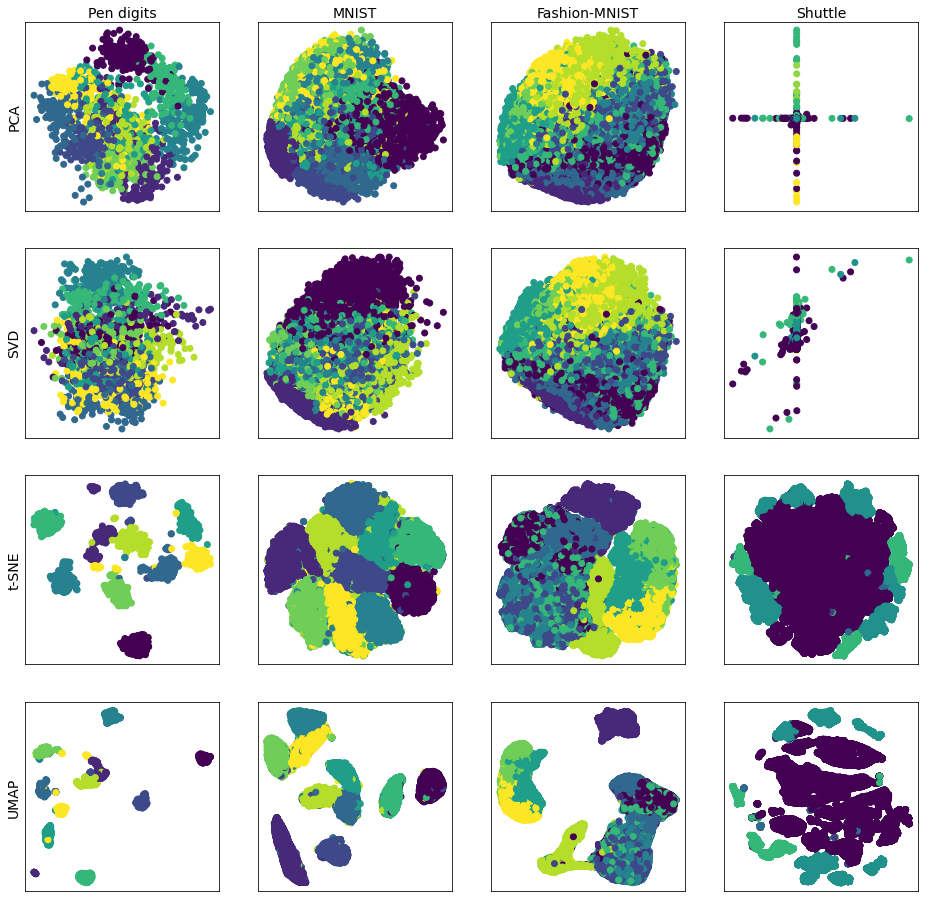

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, (model, a_name) in enumerate(models):
    for j, (x, y, d_name) in enumerate(datasets):
        if i == 0:
            axs[i, j].set_xlabel(f'{d_name}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{a_name}', fontsize=14)
        
        embeddings = model.fit_transform(x)

        axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=y.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

In [7]:
plt.show()

Results:
* PCA and SVD work fast, but result clustering is not clear.
* t-SNE works slow, but result in a good clustering.
* UMAP works fast and has good result, so it could be considered as optimal algorithm.